In [7]:
import pandas as pd
import numpy as np
import cv2
import glob

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/tomData/unshuffled3x3tiles.csv")
print(data.shape)

(19992, 4)


In [177]:
bb = [
'tloz9_2',
'tloz1_2',
'tloz6_2',
'tloz3_2',
'tloz7_2',
'tloz5_2',
'tloz8_2',
'tloz8_1',
'tloz2_2',
'tloz5_1',
'tloz3_1',
'tloz9_1',
'tloz2_1',
'tloz6_1',
'tloz4_1',
'tloz1_1',
'tloz7_1',
]
print(len(bb))

lozTextLevelPaths = [path[path.rfind('/')+1:path.find('.txt')] for path in glob.glob("../data/vglc/The Legend of Zelda/Processed/tloz[0-9]_[0-9].txt")]
print(len(lozTextLevelPaths))
print(lozTextLevelPaths)
lozTextLevelPaths = sorted(lozTextLevelPaths)

for i, level in enumerate(sorted(bb)):
    print(level, " ", lozTextLevelPaths[i])
    

17
18
['tloz7_1', 'tloz5_1', 'tloz4_1', 'tloz2_2', 'tloz5_2', 'tloz8_1', 'tloz3_1', 'tloz6_1', 'tloz7_2', 'tloz2_1', 'tloz8_2', 'tloz1_2', 'tloz4_2', 'tloz3_2', 'tloz9_2', 'tloz6_2', 'tloz9_1', 'tloz1_1']
tloz1_1   tloz1_1
tloz1_2   tloz1_2
tloz2_1   tloz2_1
tloz2_2   tloz2_2
tloz3_1   tloz3_1
tloz3_2   tloz3_2
tloz4_1   tloz4_1
tloz5_1   tloz4_2
tloz5_2   tloz5_1
tloz6_1   tloz5_2
tloz6_2   tloz6_1
tloz7_1   tloz6_2
tloz7_2   tloz7_1
tloz8_1   tloz7_2
tloz8_2   tloz8_1
tloz9_1   tloz8_2
tloz9_2   tloz9_1


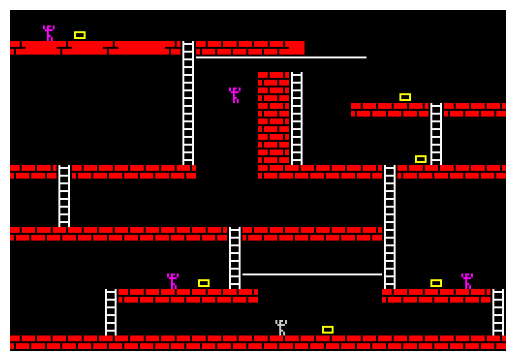

In [9]:
lrLevel1Image = cv2.cvtColor(cv2.imread("../data/vglc/Lode Runner/Original_Fixed_Tom/Level 1.png"), cv2.COLOR_BGR2RGB)

plt.axis(False)
plt.imshow(lrLevel1Image)

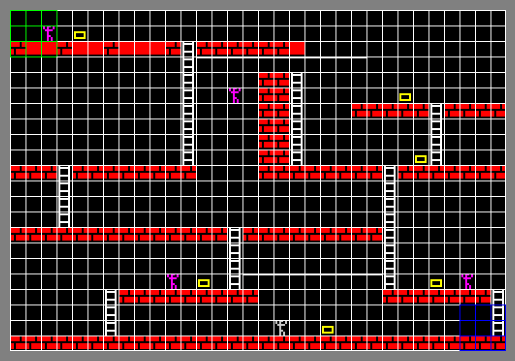

In [10]:
splitImage = lrLevel1Image.copy()

splitImage[::16, :, :] = (255, 255, 255)
splitImage[:, ::16, :] = (255, 255, 255)

splitImage[:, -1, :] = (255, 255, 255)
splitImage[-1, :, :] = (255, 255, 255)

splitImage[:64:16, :48, :] = (0, 255, 0)
splitImage[:48, :64:16, :] = (0, 255, 0)

splitImage[-48::16, -48:, :] = (0, 0, 255)
splitImage[-48:, -48::16, :] = (0, 0, 255)

splitImage[-48:, -1, :] = (0, 0, 255)
splitImage[-1, -48:, :] = (0, 0, 255)

fig = plt.figure()
fig.patch.set_facecolor('grey')

ax = fig.add_subplot(111)
ax.axis(False)

plt.imshow(splitImage)

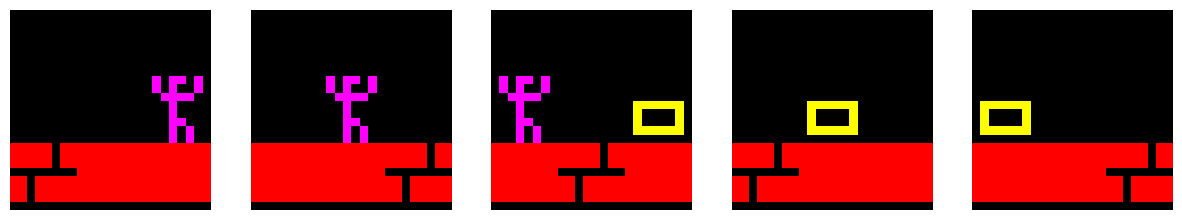

In [11]:
first5Kernels = [lrLevel1Image[:48, i*16:(i*16)+48, :] for i in range(5)]

fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for i, ax in enumerate(axes):
    ax.axis(False)
    ax.imshow(first5Kernels[i])

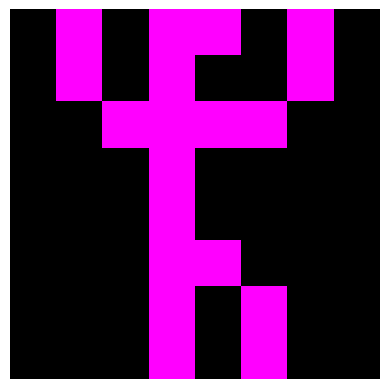

In [12]:
plt.axis(False)
plt.imshow(first5Kernels[1][16:32, 16:32, :])

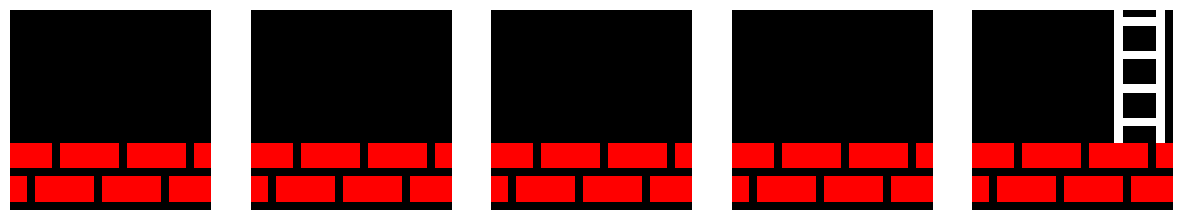

In [152]:
last5Kernels = [lrLevel1Image[-48:, 400+i*16:(400+i*16)+48, :] for i in range(5)]

fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for i, ax in enumerate(axes):
    ax.axis(False)
    ax.imshow(last5Kernels[i])

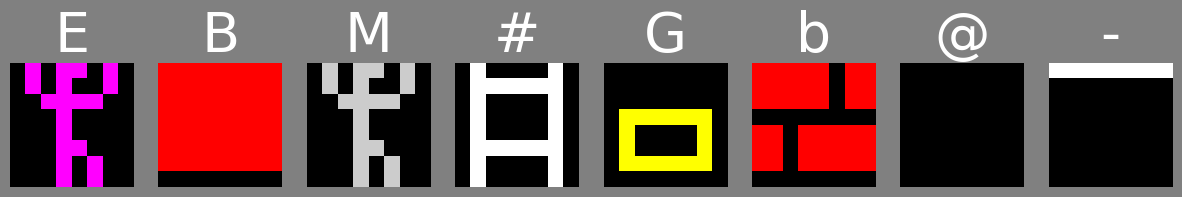

In [168]:
lrSpritePaths = glob.glob("../data/tomData/sprites/loderunner/*")
# lrSpritePaths = glob.glob("../data/sprites/loderunner/*")

lrTiles = [cv2.cvtColor(cv2.imread(spritePath), cv2.COLOR_BGR2RGB) for spritePath in lrSpritePaths]

fig, axes = plt.subplots(1, 8, figsize=(15, 15))
fig.patch.set_color("grey")

for i, ax in enumerate(axes):
    title = lrSpritePaths[i][lrSpritePaths[i].rfind('/')+1:lrSpritePaths[i].find('.png')]
    ax.set_title(title, color='white', fontsize=40)
    ax.axis(False)
    ax.imshow(lrTiles[i])